In [39]:
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (15, 10)

In [3]:
conn = sqlite3.Connection("data.db")

In [25]:
fundamentals = pd.read_sql("SELECT * FROM fundamentals WHERE ticker='AAPL'", conn)
fundamentals = fundamentals[fundamentals["dimension"] == "ART"]
fundamentals = fundamentals.set_index(pd.to_datetime(fundamentals["datekey"]))

prices = pd.read_sql("SELECT * FROM prices WHERE ticker='AAPL'", conn)
prices = prices.set_index(pd.to_datetime(prices["date"]))

In [35]:
test = prices.join(fundamentals, rsuffix="fund").fillna(method="ffill")

In [59]:
marketcap = (test["closeadj"] * test["shareswa"])

<AxesSubplot:xlabel='date'>

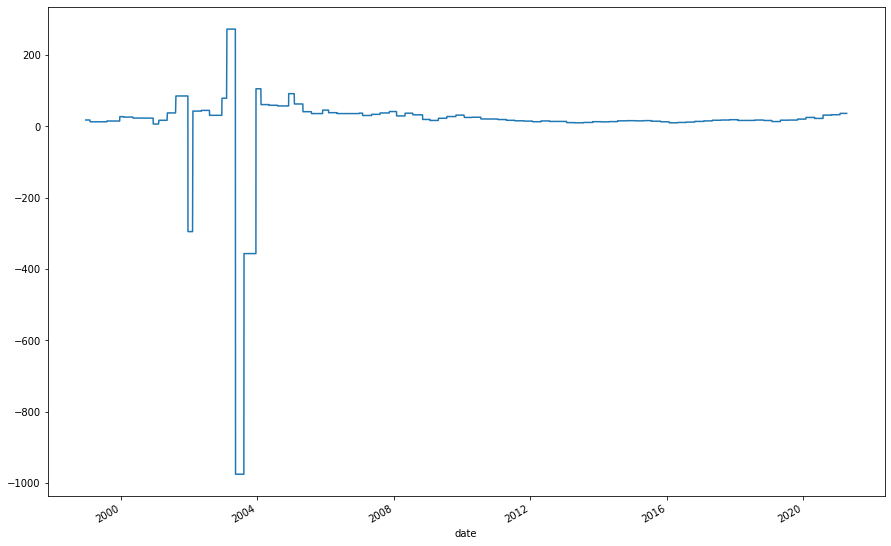

In [60]:
test["pe"].plot()

In [62]:
pe = marketcap / test["netinccmnusd"]
pe[pe < 0] = 0

<AxesSubplot:xlabel='date'>

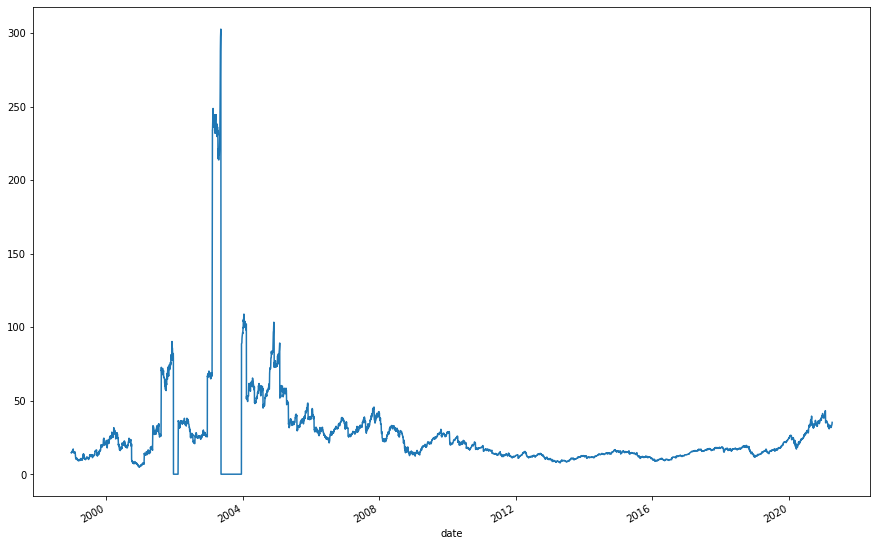

In [93]:
pe.plot()

In [101]:
pd.read_sql("SELECT COUNT(*) FROM fundamentals WHERE dimension='ART'", conn)

,COUNT(*)
0,541902
